In [1]:
%load_ext autoreload

In [405]:
%autoreload 
import matplotlib.pyplot as plt 
import numpy as np 
import utils 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
a_0,0.392938,-0.546297,0.438938,0.961528,-0.038136,-0.313644,-0.122856,-0.203911,-0.635017,0.063103,0.268802,0.448911,0.444887,-0.276423,-0.412572,-0.815790,-0.138274,-0.148339,-0.147297,0.888320
a_1,-0.427721,0.102630,-0.153787,0.369659,-0.215765,0.458099,-0.880644,0.475991,-0.649096,0.063655,0.698864,0.222047,-0.354082,-0.543474,0.261952,-0.132598,-0.012630,-0.375478,0.786778,0.003673
v,0.661558,0.204057,0.385557,0.473344,0.879678,0.325410,0.534731,0.987004,0.567537,0.651605,0.208566,0.843707,0.642754,0.590561,0.408487,0.373709,0.475320,0.713171,0.887911,0.559380


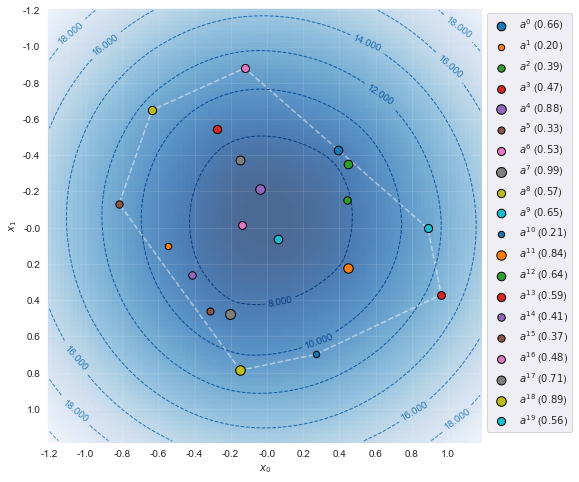

In [407]:
problem = utils.Problem.generate(20, seed=123, objective='median_l2')
plt.figure(figsize=(10, 8))
problem.plot_2d();
problem

In [385]:
def grad_norm_at_k(A, v, k):
    """
    Computes the gradient norm at x = A[k]
    """
    # Generate index set M with i=k subtracted 
    M = [i for i in range(len(A)) if i != k]
    # Compute gradient contributions for all i != k
    diff = A[k] - A[M]
    norm = utils.L2(diff)
    # Multiply in weights v_i and sum all gradient contributions 
    grad = (v[M, None] * diff / norm[:,None]).sum(axis=0)
    # And take its L2 norm 
    return utils.L2(grad)

In [386]:
A, v = problem.A, problem.v 

print('Checking for test_k <= v_k')
solutions = []
for k in range(len(A)):
    test_k = test(A, v, k)
    v_k = v[k]
    ok = test_k <= v_k 
    if ok:
        solutions.append(k)
    print(f'k = {k}: {test_k :.2f} <= {v_k :.2f} {"✅" if ok else "❌"}')
    
if solutions:
    print(f'Found solutions: {solutions}')
else:
    print('No easy solutions')

Checking for test_k <= v_k
k = 0: 7.35 <= 0.66 ❌
k = 1: 7.64 <= 0.20 ❌
k = 2: 5.69 <= 0.39 ❌
k = 3: 9.83 <= 0.47 ❌
k = 4: 2.54 <= 0.88 ❌
k = 5: 7.51 <= 0.33 ❌
k = 6: 9.46 <= 0.53 ❌
k = 7: 6.48 <= 0.99 ❌
k = 8: 9.56 <= 0.57 ❌
k = 9: 1.85 <= 0.65 ❌
k = 10: 8.67 <= 0.21 ❌
k = 11: 6.34 <= 0.84 ❌
k = 12: 7.06 <= 0.64 ❌
k = 13: 7.56 <= 0.59 ❌
k = 14: 6.88 <= 0.41 ❌
k = 15: 9.25 <= 0.37 ❌
k = 16: 2.78 <= 0.48 ❌
k = 17: 5.30 <= 0.71 ❌
k = 18: 9.24 <= 0.89 ❌
k = 19: 9.17 <= 0.56 ❌
No easy solutions


In [387]:
def initialize_com(A, v):
    """
    Generates an initial x at the center of mass (com) of A 
    
    Note: this is the solution to the median problem 
          with squared euclidean norm 
    """
    return np.average(A, weights=v, axis=0)

def initialize_random(A, v):
    """
    Generates a random initialization
    """
    return np.random.uniform(-1, 1, size=2)

def next_iterate(A, v, x, eps=1e-6):
    """
    Generates the next iterate of x according to the Weiszfeld Algorithm
    """
    # Compute distances d2(a_i, x) = ||a_i - x||_2
    norms = utils.L2(A - x)
    # Compute total weights: sum_i[ v_i * 1 / d(a_i, x) ]
    weights = v * 1 / (norms + eps)  # Add small eps for numerical stability 
    # Compute next iterate 
    return (weights[:,None] * A).sum(axis=0) / weights.sum()
    

def stopping_criterion(A, v, x):
    """
    Determines whether the Weiszfeld Algorithm should be stopped 
    
    TODO: figure out and implement 
    """
    return False 

No convergence


,x0,x1,f(x)
0,0.731908,-0.338612,10.396630
1,0.212350,-0.099458,6.803457
2,0.093694,-0.067149,6.523898
3,0.040699,-0.052290,6.466686
4,0.021727,-0.046694,6.459111
5,0.014979,-0.044915,6.458154
6,0.012492,-0.044444,6.458027
7,0.011547,-0.044383,6.458009
8,0.011175,-0.044431,6.458006
9,0.011023,-0.044492,6.458005


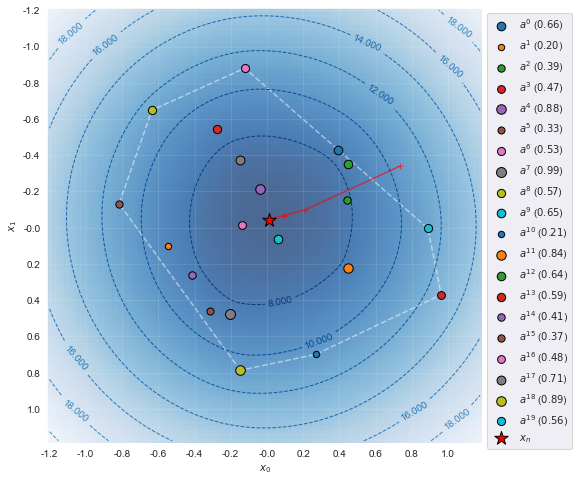

In [412]:
# Parameters 
MAX_STEPS = 10 
INITIALIZE = initialize_random
CONVERGED = stopping_criterion 

# Grab parameters and initialize 
A = problem.A
v = problem.v 
x = INITIALIZE(A, v)

# Store iterates 
iterates = [x]

for i in range(MAX_STEPS):
    x = next_iterate(A, v, x)
    iterates.append(x)
    if CONVERGED(A, v, x):
        print(f'Convergence after {i+1} steps')
        break 
else:
    print('No convergence')

plt.figure(figsize=(10, 8))
problem.plot_2d(iterates=iterates);
res = pd.DataFrame(iterates, columns=['x0', 'x1'])
res['f(x)'] = problem(res)
res